<a href="https://colab.research.google.com/github/satyajitghana/PadhAI-Course/blob/master/02_MorePythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.9MB/s 
Uploaded file with ID 1156EsudlNoq-zOWwGJ-bB1CI1Xay5KyA


In [0]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Sample file.txt, id 1156EsudlNoq-zOWwGJ-bB1CI1Xay5KyA


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1HKLF5jYxBUcH_cszYChWKiK-4lRYXH9c' # https://drive.google.com/open?id=1HKLF5jYxBUcH_cszYChWKiK-4lRYXH9c
downloaded = drive.CreateFile({'id': file_id})
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned.csv')

In [0]:
!ls

adc.json  mobile_cleaned.csv  sample_data


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [0]:
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [0]:
dir(data)

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__red

In [0]:
len(data)

109

In [0]:
data.shape

(109, 40)

In [0]:
data.loc[5]

sim_type                                0.0
aperture                               14.0
gpu_rank                               55.0
weight                                179.0
stand_by_time                         280.0
processor_frequency                     1.3
thickness                               7.9
flash_type                              5.0
front_camera_resolution                 5.0
auto_focus                              3.0
screen_size                             5.5
frames_per_second                      30.0
FM                                      3.0
no_of_reviews_in_gsmarena_in_week       6.0
os                                      0.0
phone_height                          150.0
screen_protection                       5.0
sim_size                                3.0
price                                5999.0
talk_time                              22.0
video_resolution                      720.0
display_resolution                      0.0
removable_battery               

In [0]:
data[0:10]

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0
5,0,14,55,179.0,280,1.3,7.9,5,5.00,3,5.5,30,3,6,0,150.0,5,3,5999,22,720,0,0,2,8.00,1,1,7,4,6,4,7,3,71.0,32.0,6,3,2900,165,0
6,1,1,56,124.0,230,1.3,8.8,5,2.00,3,4.0,30,3,0,0,123.0,26,3,5999,11,1080,16,3,2,5.00,1,512,5,30,0,4,4,3,62.5,128.0,2,3,1700,163,1
7,0,8,41,154.0,182,1.0,8.1,5,2.00,3,5.0,30,5,0,0,132.0,26,3,6599,7,720,4,3,2,8.00,0,2,2,4,6,4,9,3,78.0,32.0,6,3,2000,92,1
8,1,8,41,214.0,182,1.0,8.2,5,2.00,3,5.0,30,3,39,0,172.0,18,3,6599,6,720,14,3,2,8.00,1,2,2,4,6,4,9,6,80.0,32.0,6,7,2000,92,1
9,0,1,55,155.0,435,1.3,11.6,5,2.00,3,5.0,15,2,5,0,142.1,5,3,6649,9,720,4,1,2,8.00,1,2,7,4,6,4,9,6,72.4,32.0,5,3,3000,125,1


In [0]:
df_thin = data[['stand_by_time', 'thickness', 'expandable_memory', 'price', 'battery_capacity', 'is_liked']]

In [0]:
df_thin.head()

,stand_by_time,thickness,expandable_memory,price,battery_capacity,is_liked
0,250,10.5,64.0,3870,2000,1
1,300,10.6,32.0,4059,2000,1
2,329,8.5,32.0,4777,2500,0
3,385,8.0,32.0,5799,3000,1
4,385,7.9,32.0,5990,3000,0


In [0]:
df_thin.shape

(109, 6)

In [0]:
df_liked = df_thin[df_thin['is_liked'] == 1]

In [0]:
df_liked.shape

(92, 6)

In [0]:
df_thin['price'].mean()

19373.211009174312

In [0]:
df_thin['price'].count()

109

In [0]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [0]:
df_thin.describe()

,stand_by_time,thickness,expandable_memory,price,battery_capacity,is_liked
count,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,8.330275,104.513761,19373.211009,2841.779817,0.844037
std,176.44206,1.173828,275.799767,14039.197220,655.003963,0.364496
min,160.00000,5.100000,0.000000,3870.000000,1560.000000,0.000000
25%,264.00000,7.600000,0.000000,8999.000000,2470.000000,1.000000
50%,360.00000,8.100000,32.000000,14614.000000,2900.000000,1.000000
75%,500.00000,8.900000,128.000000,24999.000000,3100.000000,1.000000
max,1093.00000,11.600000,2048.000000,64500.000000,5000.000000,1.000000


In [0]:
df_thin[df_thin['is_liked'] == 1]['price'].mean()

19393.239130434784

In [0]:
df_thin[df_thin['is_liked'] == 0]['price'].mean()

19264.823529411766

In [0]:
g = df_thin.groupby(['is_liked'])

In [0]:
for key, df_key in g:
    print(key, df_key)

0      stand_by_time  thickness  ...  battery_capacity  is_liked
2              329        8.5  ...              2500         0
4              385        7.9  ...              3000         0
5              280        7.9  ...              2900         0
11             300        7.9  ...              2600         0
22             354        7.6  ...              2400         0
38             490        8.8  ...              2100         0
53             345        7.3  ...              2950         0
60             840        8.9  ...              4100         0
74             390        8.1  ...              2800         0
77             620        8.5  ...              3100         0
78             618        9.3  ...              3600         0
80             598        7.3  ...              3000         0
83             504        7.6  ...              2600         0
90             500        9.2  ...              3760         0
91             240        7.6  ...              1624 

In [0]:
df_thin.groupby(['is_liked']).mean()

,stand_by_time,thickness,expandable_memory,price,battery_capacity
is_liked,,,,,
0,457.235294,8.200000,68.235294,19264.823529,2874.941176
1,394.945652,8.354348,111.217391,19393.239130,2835.652174


In [0]:
df_thin.groupby(['is_liked']).describe()

stand_by_time                          ... battery_capacity                
                 count        mean         std  ...              50%     75%     max
is_liked                                        ...                                 
0                 17.0  457.235294  157.094927  ...           2900.0  3000.0  4100.0
1                 92.0  394.945652  178.876246  ...           2900.0  3100.0  5000.0

[2 rows x 40 columns]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

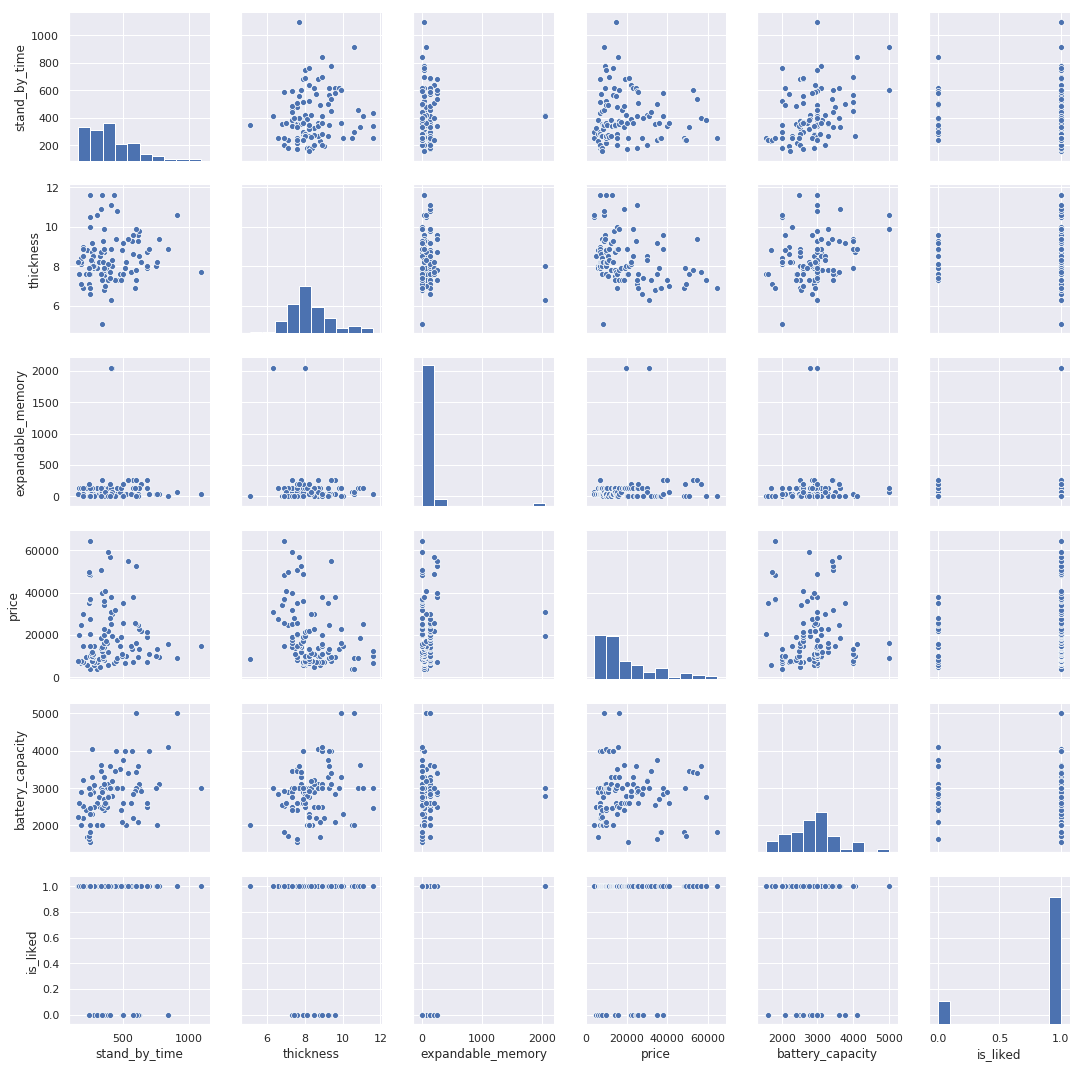

In [0]:
ax = sns.pairplot(df_thin, diag_kind='hist')

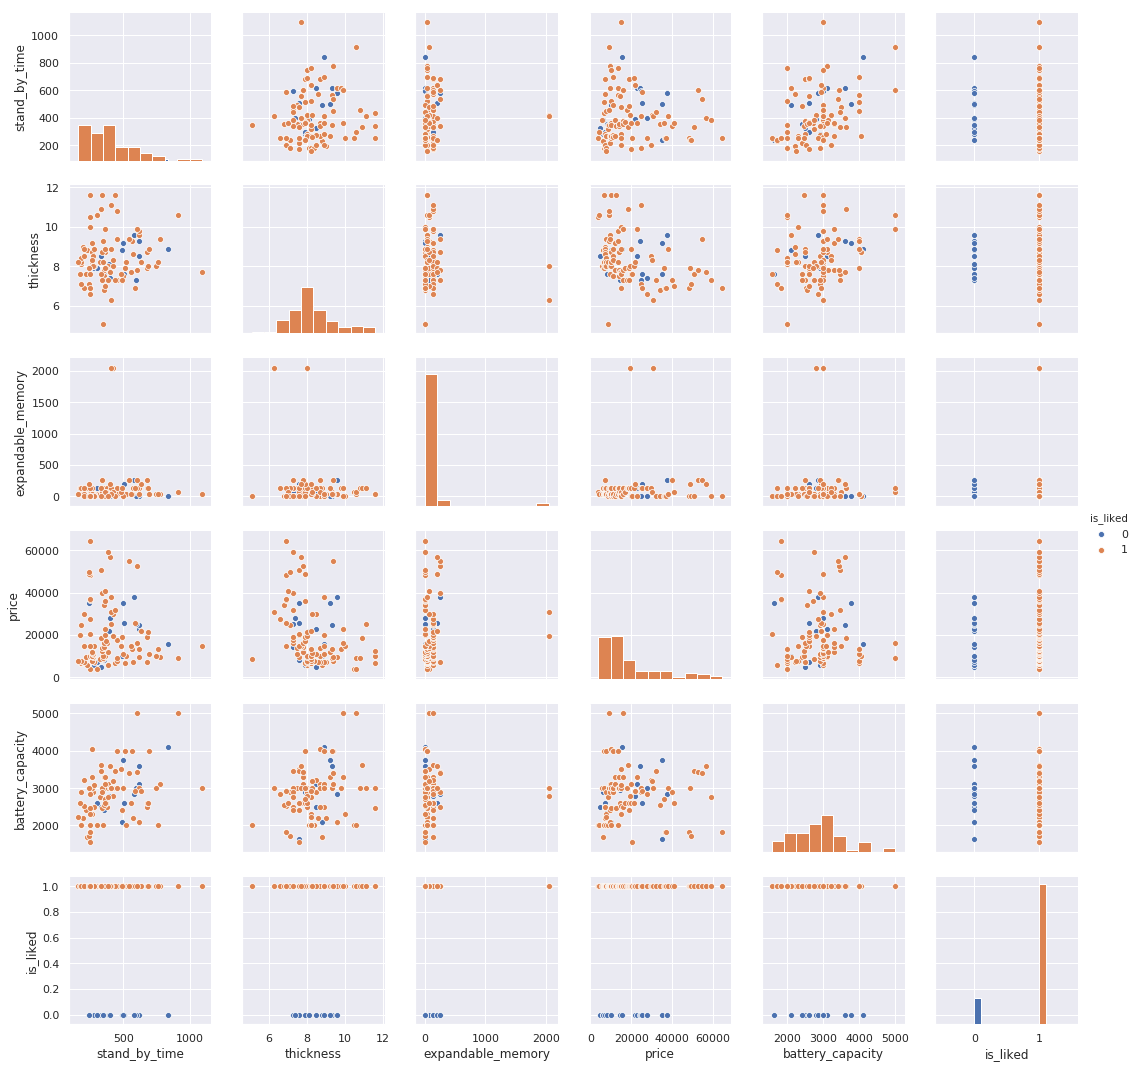

In [0]:
ax = sns.pairplot(df_thin, diag_kind='hist', hue='is_liked')

# Debugging

In [0]:
import random

In [0]:
def factorial(x):
    if (x == 0):
        return 1
    return x * factorial(x - 1)

In [0]:
factorial(5)

120

In [0]:
def code_to_debug():
    import pdb; pdb.set_trace()
    
    for i in range(10):
        x = random.random()
        factorial(x)

In [0]:
code_to_debug()

> <ipython-input-50-d06a64c74608>(4)code_to_debug()
-> for i in range(10):
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help c
c(ont(inue))
        Continue execution, only stop when a breakpoint is encountered.
(Pdb) l
  1  	def code_to_debug():
  2  	    import pdb; pdb.set_trace()
  3  	
  4  ->	    for i in range(10):
  5  	        x = random.random()
  6  	        factorial(x)
[EOF]
(Pdb) n
> <ipython-input-50-d06a64

RecursionError: ignored

In [0]:
%xmode verbose

Exception reporting mode: Verbose
